In [3]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
import scib_metrics
%matplotlib inline
import sys
sys.path.append('..')
from functions import *

In [5]:
adata = anndata.read_h5ad(filename="../data/adataImmHum4.h5ad")
adata

AnnData object with n_obs × n_vars = 33506 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [6]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal", log=True, logname="sdImmBench",save="models/IBM_StandardNormal")

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/sdImmBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [10:42<00:00,  1.61s/it, v_num=0, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [10:42<00:00,  1.61s/it, v_num=0, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3]


In [7]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus",log=True,logname="mogImmBench",save="models/IBM_MixtureOfGaussians")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/mogImmBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:52<00:00,  1.93s/it, v_num=0, train_loss_step=1.63e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:52<00:00,  1.93s/it, v_num=0, train_loss_step=1.63e+3, train_loss_epoch=1.46e+3]


In [8]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp",log=True,logname="vampImmBench",save="models/IBM_Vamp")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/vampImmBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [16:03<00:00,  2.56s/it, v_num=0, train_loss_step=1.37e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [16:03<00:00,  2.41s/it, v_num=0, train_loss_step=1.37e+3, train_loss_epoch=1.46e+3]


In [9]:
flowAdata, vaeNF = trainModelBenchmark(adata.copy(), 'normalflow', log=True, logname="flowImmBench",save="models/IBM_NormalFlow")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/flowImmBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [23:59<00:00,  3.84s/it, v_num=0, train_loss_step=1.2e+3, train_loss_epoch=1.46e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [23:59<00:00,  3.60s/it, v_num=0, train_loss_step=1.2e+3, train_loss_epoch=1.46e+3]


In [10]:
allAdata = sdnormalAdata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]
allAdata.obsm["scVINF"] = flowAdata.obsm["scVI"]

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.411204032599926
INFO:root:Erythrocytes: 0.6199747920036316
INFO:root:Erythroid progenitors: 0.49236167361959815
INFO:root:Monocyte progenitors: 0.4451630264520645
Embeddings:  17%|█▋        | 1/6 [00:54<04:30, 54.19s/it]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.5524995140731335
INFO:root:Erythrocytes: 0.5874729752540588
INFO:root:Erythroid progenitors: 0.6014610305428505
INFO:root:Monocyte progenitors: 0.5329934842884541
Embeddings:  33%|███▎      | 2/6 [08:01<18:14, 273.74s/it]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.6479796469211578
INFO:root:Erythrocytes: 0.6022309213876724
INFO:root:Erythroid progenitors: 0.6390579789876938
INFO:root:Monocyte progenitors: 0.5866606086492538
Embeddings:  50%|█████     | 3/6 [08:52<08:35, 171.84s/it]INFO:root:isolated labels: n

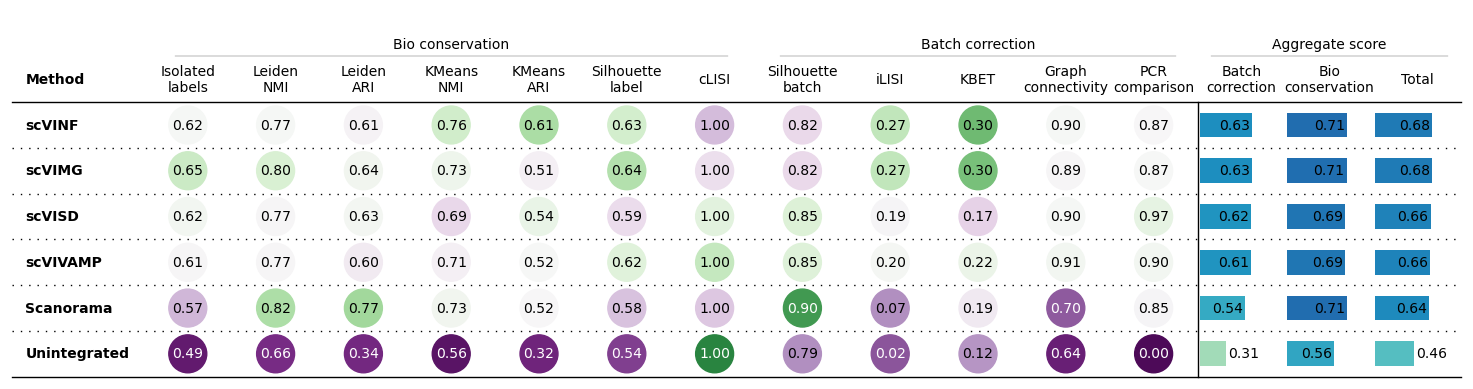

In [11]:
plotBenchmarkResults(allAdata,keys = ["Unintegrated","Scanorama","scVISD","scVIMG","scVIVAMP","scVINF"],label_key="final_annotation", save_dir="Benchmarks/")